In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
from scipy import stats

In [2]:
base5_df = Path("../Input/base_5_data.csv")
df = pd.read_csv(base5_df)
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,723,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,724,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,725,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,726,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
4,727,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [3]:
brand_count = df.brand.value_counts()
print(brand_count)

volkswagen       7739
skoda            7064
seat             6995
opel             6804
ford             6629
audi             5424
toyota           5073
mercedes-benz    5022
bmw              3535
renault          3171
kia              2950
hyundai          2819
peugeot          2708
fiat             2585
mazda            2316
volvo            2132
mini             1992
citroen          1913
nissan           1838
land-rover       1826
dacia            1676
jeep             1120
porsche           949
jaguar            902
alfa-romeo        657
mitsubishi        544
honda             328
maserati          299
dodge             224
bentley           223
smart             210
ssangyong         194
lamborghini       172
ferrari           139
isuzu             124
aston-martin      109
lada               79
cadillac           62
chevrolet          44
chrysler           17
infiniti            8
rover               1
Name: brand, dtype: int64


In [4]:
eff_df = df.drop(['model','color','registration_date','transmission_type','fuel_type','fuel_consumption_l_100km','mileage_in_km'], axis = 'columns')
eff_df.head()

,Unnamed: 0,brand,year,price_in_euro,power_ps
0,723,alfa-romeo,2019,41990,510
1,724,alfa-romeo,2019,16995,120
2,725,alfa-romeo,2019,30880,209
3,726,alfa-romeo,2019,30890,190
4,727,alfa-romeo,2019,68900,510


In [5]:
q5_df = eff_df[eff_df['brand'].str.contains('opel|ford|audi|toyota|mercedes-benz|bmw|renault|kia|hyundai|peugeot|fiat|mazda|volvo|mini|citroen|nissan|land-rover|dacia|jeep|porsche|jaguar|alfa-romeo|mitsubishi|honda|maserati|dodge|bentley|smart|ssangyong|lamborghini|ferrari|isuzu|aston-martin|lada|cadillac|chevrolet|chrysler|infiniti|rover') == False]
q5_df

,Unnamed: 0,brand,year,price_in_euro,power_ps
59209,181533,seat,2019,16990,95
59210,181535,seat,2019,12100,60
59211,181536,seat,2019,19999,116
59212,181537,seat,2019,14380,116
59213,181538,seat,2019,13990,116
...,...,...,...,...,...
86479,246905,volkswagen,2023,28788,110
86480,246907,volkswagen,2023,28420,110
86481,246908,volkswagen,2023,59990,150
86482,246911,volkswagen,2023,30370,207


In [6]:
q5_seat_df = q5_df[q5_df['brand'].str.contains('volkswagen|skoda') == False]
q5_seat_df

,Unnamed: 0,brand,year,price_in_euro,power_ps
59209,181533,seat,2019,16990,95
59210,181535,seat,2019,12100,60
59211,181536,seat,2019,19999,116
59212,181537,seat,2019,14380,116
59213,181538,seat,2019,13990,116
...,...,...,...,...,...
66199,189377,seat,2023,34290,150
66200,189378,seat,2023,38080,204
66201,189379,seat,2023,26490,110
66202,189380,seat,2023,22990,110


In [7]:
q5_volkswagen_df = q5_df[q5_df['brand'].str.contains('skoda|seat') == False]
q5_volkswagen_df

,Unnamed: 0,brand,year,price_in_euro,power_ps
78745,237939,volkswagen,2019,26930,150
78746,237940,volkswagen,2019,28220,116
78747,237941,volkswagen,2019,19890,131
78748,237942,volkswagen,2019,23220,150
78749,237944,volkswagen,2019,44545,150
...,...,...,...,...,...
86479,246905,volkswagen,2023,28788,110
86480,246907,volkswagen,2023,28420,110
86481,246908,volkswagen,2023,59990,150
86482,246911,volkswagen,2023,30370,207


In [8]:
q5_skoda_df = q5_df[q5_df['brand'].str.contains('volkswagen|seat') == False]
q5_skoda_df

,Unnamed: 0,brand,year,price_in_euro,power_ps
66204,195302,skoda,2019,20900,150
66205,195303,skoda,2019,14870,110
66206,195305,skoda,2019,18180,150
66207,195306,skoda,2019,14420,150
66208,195307,skoda,2019,13980,95
...,...,...,...,...,...
73263,203416,skoda,2023,19750,110
73264,203417,skoda,2023,33380,150
73265,203418,skoda,2023,33380,150
73266,203419,skoda,2023,23960,95


<Axes: xlabel='power_ps', ylabel='price_in_euro'>

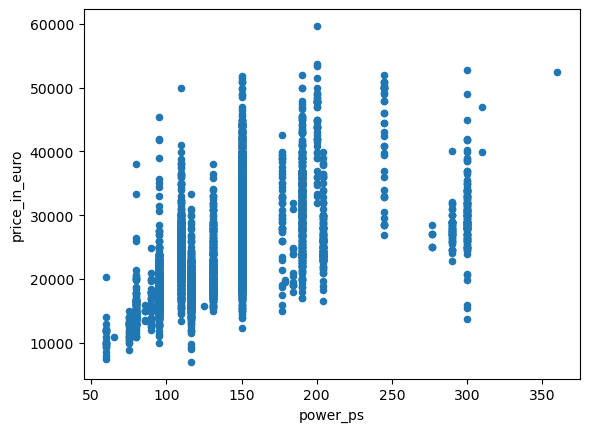

In [9]:
q5_seat_df.plot.scatter('power_ps','price_in_euro')

<Axes: xlabel='power_ps', ylabel='price_in_euro'>

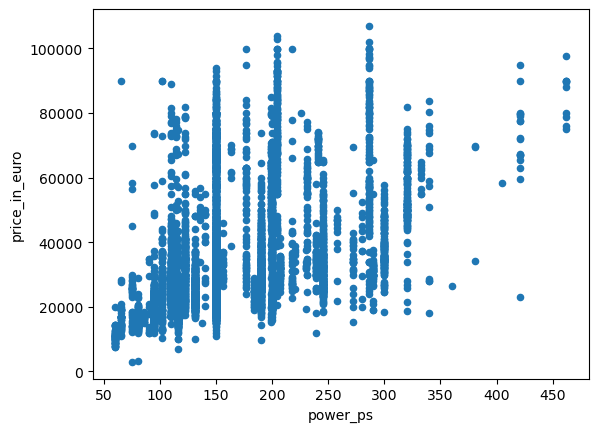

In [10]:
q5_volkswagen_df.plot.scatter('power_ps','price_in_euro')

<Axes: xlabel='power_ps', ylabel='price_in_euro'>

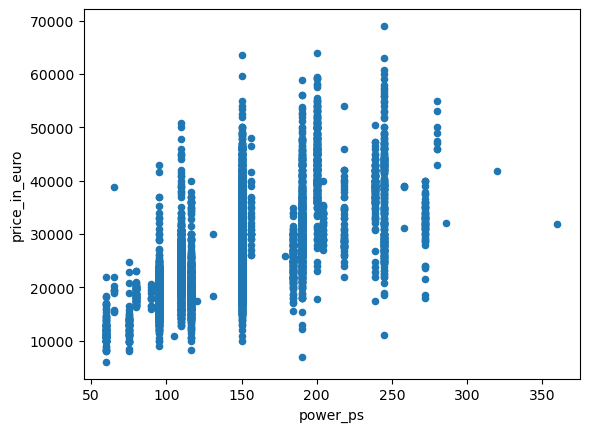

In [11]:
q5_skoda_df.plot.scatter('power_ps','price_in_euro')

In [17]:
q5_seat_df['price_in_euro'].corr(q5_seat_df['power_ps'])

0.5146972013415813

In [18]:
q5_volkswagen_df['price_in_euro'].corr(q5_volkswagen_df['power_ps'])

0.45311782114879673

In [22]:
q5_skoda_df['price_in_euro'].corr(q5_skoda_df['power_ps'])

0.6282053320158882

In [23]:
x_axis = np.arange(len(q5_seat_df))
tick_locations = [value for value in x_axis]

In [ ]:
plt.scatter(q5_seat_df['power_ps'], q5_seat_df['price_in_euro'], )

In [12]:
q5_skoda_df.to_csv('../Output/skoda_data.csv')

In [13]:
q5_seat_df.to_csv('../Output/seat_data.csv')

In [14]:
q5_volkswagen_df.to_csv('../Output/volkswagen_data.csv')